<a href="https://colab.research.google.com/github/suchijayani6/Data_Science_Capstone/blob/master/Final_project_Weektwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


In [139]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [0]:
import json

In [0]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [142]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [143]:
neighborhood_data = newyork_data["features"]
neighborhood_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [0]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [0]:
for data in neighborhood_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [0]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [146]:
neighborhoods["Borough"].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

In [147]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [148]:
brooklyn_data

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
5,Brooklyn,Brighton Beach,40.576825,-73.965094
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438
8,Brooklyn,Flatbush,40.636326,-73.958401
9,Brooklyn,Crown Heights,40.670829,-73.943291


In [149]:
CLIENT_ID = 'X04QMLZDPOUZMDYOSAHHRGXQ1NP34NOG0YZFZIIK32O5LZ3L' # your Foursquare ID
CLIENT_SECRET = 'WI0WPZFBYCWGPDMWWDJYL1AWCJRRFM5BEELDQUHQI5AZOCFJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X04QMLZDPOUZMDYOSAHHRGXQ1NP34NOG0YZFZIIK32O5LZ3L
CLIENT_SECRET:WI0WPZFBYCWGPDMWWDJYL1AWCJRRFM5BEELDQUHQI5AZOCFJ


It shows Brooklyn as 70 neighborhoods.

In [0]:

radius = 500
LIMIT = 100
search_query = "Bank"


In [151]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [152]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)



40.6501038 -73.9495823


In [153]:
! pip install folium
import folium

map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [154]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [155]:
# url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     VERSION, 
#     neighborhood_latitude, 
#     neighborhood_longitude, 
#     radius, 
#     LIMIT)
# url # display URL

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=X04QMLZDPOUZMDYOSAHHRGXQ1NP34NOG0YZFZIIK32O5LZ3L&client_secret=WI0WPZFBYCWGPDMWWDJYL1AWCJRRFM5BEELDQUHQI5AZOCFJ&ll=40.625801065010656,-74.03062069353813&v=20180605&query=Bank&radius=500&limit=100'

In [156]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbdfe486a60715adcae972f'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d10a951735',
      'name': 'Bank',
      'pluralName': 'Banks',
      'primary': True,
      'shortName': 'Bank'}],
    'hasPerk': False,
    'id': '55f8a67b498eb2936cdd6086',
    'location': {'address': '8520 4th Ave',
     'cc': 'US',
     'city': 'Brooklyn',
     'country': 'United States',
     'distance': 357,
     'formattedAddress': ['8520 4th Ave',
      'Brooklyn, NY 11209',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.62303079076619,
       'lng': -74.0284726023674}],
     'lat': 40.62303079076619,
     'lng': -74.0284726023674,
     'postalCode': '11209',
     'state': 'NY'},
    'name': 'Dime Community Bank',
    'referralId': 'v-1555955273',
    'venuePage': {'id': '140276524'}},
   {'categories': [

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [158]:
# venues = results['response']['groups'][0]['items']
    
# nearby_venues = json_normalize(venues) # flatten JSON

# # filter columns
# filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
# nearby_venues =nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# # clean columns
# nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# nearby_venues.head()



# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]


dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Dime Community Bank,Bank,8520 4th Ave,US,Brooklyn,United States,NaN,357,"[8520 4th Ave, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62303079076619...",40.623031,-74.028473,11209,NY,55f8a67b498eb2936cdd6086
1,Valley Bank,Bank,7726 3rd Ave,US,Brooklyn,United States,NaN,437,"[7726 3rd Ave, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62950032147947...",40.629500,-74.028870,11209,NY,4c916ab32626a1cd993e326b
2,TD Bank,Bank,8206 5th Avenue,US,Brooklyn,United States,at 82nd St,503,"[8206 5th Avenue (at 82nd St), Brooklyn, NY 11...","[{'label': 'display', 'lat': 40.624276, 'lng':...",40.624276,-74.025013,11209,NY,4b96833af964a52032d134e3
3,Roosevelt Savings Bank,Bank,8112 5th Ave,US,Brooklyn,United States,81st and 82nd Street,526,"[8112 5th Ave (81st and 82nd Street), Brooklyn...","[{'label': 'display', 'lat': 40.62480289538896...",40.624803,-74.024530,11209,NY,50a58afce4b0913498c202b4
4,Bank of America,Bank,438 86th St,US,Brooklyn,United States,NaN,487,"[438 86th St, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62216644378372...",40.622166,-74.027401,11209,NY,4b75b2aff964a520da1d2ee3
5,Bank of America,Bank,7923 3rd Ave,US,Brooklyn,United States,NaN,270,"[7923 3rd Ave, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62783943286761...",40.627839,-74.028868,11209,NY,4c9e85160e9bb1f79b3fe85f
6,Sovereign Bank,Bank,95th + 3rd ave,US,Brooklyn,United States,NaN,157,"[95th + 3rd ave, Brooklyn, NY 11219, United St...","[{'label': 'display', 'lat': 40.62438652396349...",40.624387,-74.030692,11219,NY,4de008ffd164e323c7a21cf8
7,Northfield Bank,Bank,8512 3rd Ave,US,Brooklyn,United States,NaN,196,"[8512 3rd Ave, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62407197693654...",40.624072,-74.031078,11209,NY,5010226fe4b088a23335527c
8,Roosevelt Savings Bank,Bank,NaN,US,Brooklyn,United States,NaN,196,"[Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62665562234057...",40.626656,-74.028581,11209,NY,504b4d90e4b051cdfa79f114
9,Ridgewood Savings Bank,Building,8522 3rd Ave,US,Brooklyn,United States,NaN,216,"[8522 3rd Ave, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.62390096952115...",40.623901,-74.031157,11209,NY,523b2a39498e2779023fe8db


In [0]:
# def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
#     venues_list=[]
#     for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
#         # create the API request URL
#         url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#             CLIENT_ID, 
#             CLIENT_SECRET, 
#             VERSION, 
#             lat, 
#             lng, 
#             radius, 
#             LIMIT)
            
#         # make the GET request
#         results = requests.get(url).json()["response"]['groups'][0]['items']
        
#         # return only relevant information for each nearby venue
#         venues_list.append([(
#             name, 
#             lat, 
#             lng, 
#             v['venue']['name'], 
#             v['venue']['location']['lat'], 
#             v['venue']['location']['lng'],  
#             v['venue']['categories'][0]['name']) for v in results])

#     nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
#     nearby_venues.columns = ['Neighborhood', 
#                   'Neighborhood Latitude', 
#                   'Neighborhood Longitude', 
#                   'Venue', 
#                   'Venue Latitude', 
#                   'Venue Longitude', 
#                   'Venue Category']
    
#     return(nearby_venues)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [207]:
dataframe_filtered.keys

<bound method NDFrame.keys of                                     name categories                  address  \
0                    Dime Community Bank       Bank             8520 4th Ave   
1                            Valley Bank       Bank             7726 3rd Ave   
2                                TD Bank       Bank          8206 5th Avenue   
3                 Roosevelt Savings Bank       Bank             8112 5th Ave   
4                        Bank of America       Bank              438 86th St   
5                        Bank of America       Bank             7923 3rd Ave   
6                         Sovereign Bank       Bank           95th + 3rd ave   
7                        Northfield Bank       Bank             8512 3rd Ave   
8                 Roosevelt Savings Bank       Bank                      NaN   
9                 Ridgewood Savings Bank   Building             8522 3rd Ave   
10                         Atlantic bank       Bank                      NaN   
11        

In [200]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )




Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [201]:
print(brooklyn_venues.shape)
brooklyn_venues

(294, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Dime Community Bank,40.623031,-74.028473,Dime Community Bank
1,Bay Ridge,40.625801,-74.030621,Valley Bank,40.629500,-74.028870,Valley Bank
2,Bay Ridge,40.625801,-74.030621,TD Bank,40.624276,-74.025013,TD Bank
3,Bay Ridge,40.625801,-74.030621,Roosevelt Savings Bank,40.624803,-74.024530,Roosevelt Savings Bank
4,Bay Ridge,40.625801,-74.030621,Bank of America,40.622166,-74.027401,Bank of America
5,Bay Ridge,40.625801,-74.030621,Bank of America,40.627839,-74.028868,Bank of America
6,Bay Ridge,40.625801,-74.030621,Sovereign Bank,40.624387,-74.030692,Sovereign Bank
7,Bay Ridge,40.625801,-74.030621,Northfield Bank,40.624072,-74.031078,Northfield Bank
8,Bay Ridge,40.625801,-74.030621,Roosevelt Savings Bank,40.626656,-74.028581,Roosevelt Savings Bank
9,Bay Ridge,40.625801,-74.030621,Ridgewood Savings Bank,40.623901,-74.031157,Ridgewood Savings Bank


In [202]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,Alma Bank,Amalgamated Bank,Amazing Savings,Apple Bank,Astoria Bank,Atlantic bank,Bank Of America,Bank Of America ATM,Bank Of America atm,...,The Eye-Bank For Sight Restoration,Upsolve: Free New York Bankruptcy Help,Valley Bank,Valley National Bank,Weylin,Williamsburgh Savings Bank,alma bank,apple bank,capitol one bank Church Ave,santander bank
0,Bay Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Bay Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bay Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bay Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
test = brooklyn_onehot.groupby(["Neighborhood"]).sum().reset_index()
test.head()

,Neighborhood,Alma Bank,Amalgamated Bank,Amazing Savings,Apple Bank,Astoria Bank,Atlantic bank,Bank Of America,Bank Of America ATM,Bank Of America atm,...,The Eye-Bank For Sight Restoration,Upsolve: Free New York Bankruptcy Help,Valley Bank,Valley National Bank,Weylin,Williamsburgh Savings Bank,alma bank,apple bank,capitol one bank Church Ave,santander bank
0,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Bay Ridge,1,1,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Bedford Stuyvesant,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bensonhurst,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boerum Hill,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
test.loc[8]

Neighborhood                                     Brooklyn Heights
Alma Bank                                                       0
Amalgamated Bank                                                0
Amazing Savings                                                 0
Apple Bank                                                      0
Astoria Bank                                                    0
Atlantic bank                                                   0
Bank Of America                                                 0
Bank Of America ATM                                             0
Bank Of America atm                                             0
Bank of America                                                 1
Bank of America ATM                                             0
Bank of New York Mellon                                         0
Banker St. Triangle                                             0
BankofAmerica                                                   0
Brooklyn F

In [237]:
from sklearn.preprocessing import StandardScaler

X = test.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

num_clusters = 2

from sklearn.cluster import KMeans 

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [238]:
test["Labels"] = labels
test

,Neighborhood,Alma Bank,Amalgamated Bank,Amazing Savings,Apple Bank,Astoria Bank,Atlantic bank,Bank Of America,Bank Of America ATM,Bank Of America atm,...,Upsolve: Free New York Bankruptcy Help,Valley Bank,Valley National Bank,Weylin,Williamsburgh Savings Bank,alma bank,apple bank,capitol one bank Church Ave,santander bank,Labels
0,Bath Beach,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Bay Ridge,1,1,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Bedford Stuyvesant,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bensonhurst,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boerum Hill,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Borough Park,1,0,0,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
6,Brighton Beach,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,Broadway Junction,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Brooklyn Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Bushwick,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
test.groupby('Labels').mean()

,Alma Bank,Amalgamated Bank,Amazing Savings,Apple Bank,Astoria Bank,Atlantic bank,Bank Of America,Bank Of America ATM,Bank Of America atm,Bank of America,...,The Eye-Bank For Sight Restoration,Upsolve: Free New York Bankruptcy Help,Valley Bank,Valley National Bank,Weylin,Williamsburgh Savings Bank,alma bank,apple bank,capitol one bank Church Ave,santander bank
Labels,,,,,,,,,,,,,,,,,,,,,
0,0.018182,0.018182,0.018182,0.163636,0.018182,0.0,0.072727,0.036364,0.018182,0.2,...,0.018182,0.018182,0.090909,0.018182,0.054545,0.054545,0.018182,0.018182,0.018182,0.018182
1,1.000000,1.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,2.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [203]:
df1 = brooklyn_venues[['Neighborhood','Venue']]  
df1
             

,Neighborhood,Venue
0,Bay Ridge,Dime Community Bank
1,Bay Ridge,Valley Bank
2,Bay Ridge,TD Bank
3,Bay Ridge,Roosevelt Savings Bank
4,Bay Ridge,Bank of America
5,Bay Ridge,Bank of America
6,Bay Ridge,Sovereign Bank
7,Bay Ridge,Northfield Bank
8,Bay Ridge,Roosevelt Savings Bank
9,Bay Ridge,Ridgewood Savings Bank


In [204]:
df1_grouped = df1.groupby(['Neighborhood'])['Venue'].apply(', '.join).reset_index()
df1_grouped

,Neighborhood,Venue
0,Bath Beach,"TD Bank, Valley Bank, TD Bank, Chase Bank, Cap..."
1,Bay Ridge,"Dime Community Bank, Valley Bank, TD Bank, Roo..."
2,Bedford Stuyvesant,"Bank Of America, Capitalone bank washington ave"
3,Bensonhurst,Ridgewood Savings Bank
4,Boerum Hill,"Chase Bank, One Hanson Place / Williamsburgh ..."
5,Borough Park,"Chase Bank, Santander Bank, Dime Community Ban..."
6,Brighton Beach,"Valley Bank, Apple Bank, Chase Bank, Investors..."
7,Broadway Junction,Citibank
8,Brooklyn Heights,"Chase Bank, TD Bank, Dime Community Bank, Inve..."
9,Bushwick,Bank Of America


In [205]:
df2 = df1.groupby(["Neighborhood"]).count().reset_index()
df2

,Neighborhood,Venue
0,Bath Beach,12
1,Bay Ridge,19
2,Bedford Stuyvesant,2
3,Bensonhurst,1
4,Boerum Hill,7
5,Borough Park,17
6,Brighton Beach,9
7,Broadway Junction,1
8,Brooklyn Heights,18
9,Bushwick,1


In [206]:
df2["Venue"].sum()

294

In [217]:
merged = pd.merge(left=brooklyn_data, right=df2, how='left', left_on='Neighborhood', right_on='Neighborhood')

merged.loc[30:45]

,Borough,Neighborhood,Latitude,Longitude,Venue
30,Brooklyn,Mill Island,40.606336,-73.908186,NaN
31,Brooklyn,Manhattan Beach,40.577914,-73.943537,NaN
32,Brooklyn,Coney Island,40.574293,-73.988683,NaN
33,Brooklyn,Bath Beach,40.599519,-73.998752,12.0
34,Brooklyn,Borough Park,40.633131,-73.990498,17.0
35,Brooklyn,Dyker Heights,40.619219,-74.019314,1.0
36,Brooklyn,Gerritsen Beach,40.590848,-73.930102,1.0
37,Brooklyn,Marine Park,40.609748,-73.931344,NaN
38,Brooklyn,Clinton Hill,40.693229,-73.967843,6.0
39,Brooklyn,Sea Gate,40.576375,-74.007873,NaN


In [239]:
import numpy
merged2= merged.replace(0,np.nan)
merged2.dropna(subset=["Venue"], axis=0, inplace=True)
merged2.reset_index(inplace=True)
merged2

,index,Borough,Neighborhood,Latitude,Longitude,Venue
0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,19.0
1,1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0
2,2,Brooklyn,Sunset Park,40.645103,-74.010316,7.0
3,3,Brooklyn,Greenpoint,40.730201,-73.954241,15.0
4,4,Brooklyn,Gravesend,40.595260,-73.973471,6.0
5,5,Brooklyn,Brighton Beach,40.576825,-73.965094,9.0
6,6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,3.0
7,7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,9.0
8,8,Brooklyn,Flatbush,40.636326,-73.958401,4.0
9,9,Brooklyn,Crown Heights,40.670829,-73.943291,4.0


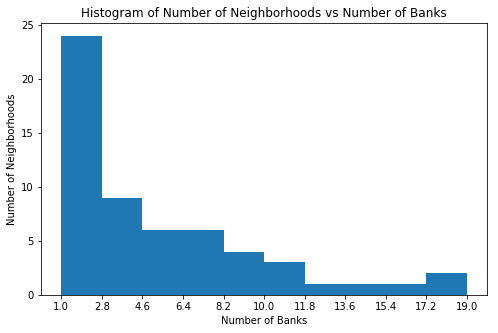

In [278]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(merged2['Venue'])
# merged2.plot( x='Neighborhood', y='Venue', kind='hist', xticks=bin_edges) 

merged2['Venue'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Number of Neighborhoods vs Number of Banks') # add a title to the h
plt.xlim = (1,20)
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Number of Banks') # add x-label
plt.show()

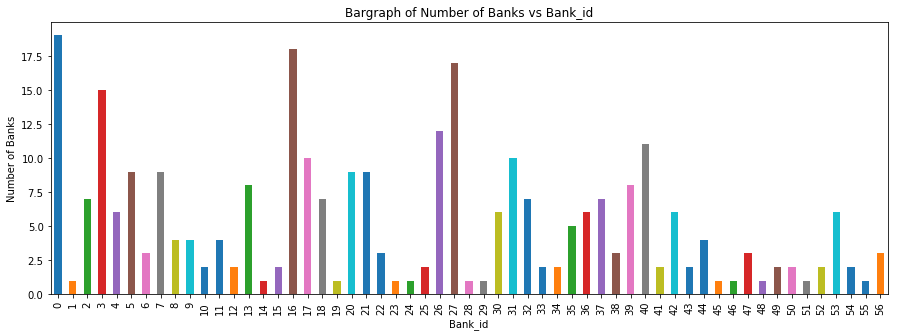

In [282]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(merged2['Venue'])
# merged2.plot( x='Neighborhood', y='Venue', kind='hist', xticks=bin_edges) 

merged2['Venue'].plot(kind='bar', figsize=(15, 5), xticks=bin_edges)
plt.title('Bargraph of Number of Banks vs Bank_id') # add a title to the h
plt.xlim = (1,20)
plt.ylabel('Number of Banks') # add y-label
plt.xlabel('Bank_id') # add x-label
plt.show()



In [313]:
test3= merged2.loc[[0, 3, 16, 17, 26, 27, 40], ["Venue"]].transpose()

test3.rename(columns={0:"Bay Ridge", 3:"Greenpoint", 16:"Brooklyn Heights", 17: "Cobble Hill",26: "Bath Beach", 27: "Borough Park", 40: "South Side"}, inplace=True)
test3.transpose()
# test3 = test2["Venue" =>10]
# test3

,Venue
Bay Ridge,19.0
Greenpoint,15.0
Brooklyn Heights,18.0
Cobble Hill,10.0
Bath Beach,12.0
Borough Park,17.0
South Side,11.0


Text(0, 0.5, 'Number of Banks')

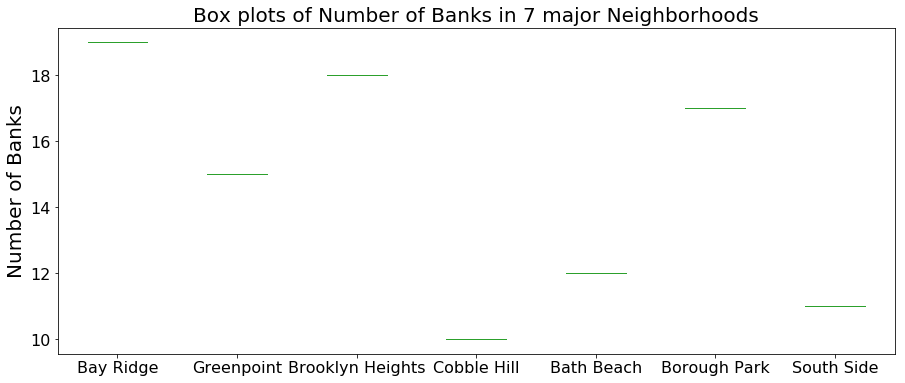

In [331]:
test3.plot(kind='box', figsize = (15,6), fontsize = 16)
plt.title('Box plots of Number of Banks in 7 major Neighborhoods', fontsize=20)
plt.ylabel('Number of Banks', fontsize = 20)


In [0]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

test3['Venue'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,# turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each
                            colors=colors_list,  # add custom colors
                            ) # 'explode' lowest 3 continents
         # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')
# add legend
plt.legend(labels=test3.index, loc='upper left')
plt.show()

In [0]:
import seaborn as sns

sns.boxplot(x="Neighborhood", y="Venue", data=merged2>10)

In [240]:
merged2.drop("index", 1, inplace=True)
merged2


,Borough,Neighborhood,Latitude,Longitude,Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,19.0
1,Brooklyn,Bensonhurst,40.611009,-73.995180,1.0
2,Brooklyn,Sunset Park,40.645103,-74.010316,7.0
3,Brooklyn,Greenpoint,40.730201,-73.954241,15.0
4,Brooklyn,Gravesend,40.595260,-73.973471,6.0
5,Brooklyn,Brighton Beach,40.576825,-73.965094,9.0
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,3.0
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,9.0
8,Brooklyn,Flatbush,40.636326,-73.958401,4.0
9,Brooklyn,Crown Heights,40.670829,-73.943291,4.0


In [241]:
map_brooklyn_banks = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(merged2['Latitude'], merged2['Longitude'], merged2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn_banks)  
    
map_brooklyn_banks

# latitude = 40.6501038 
# longitude = -73.9495823

# map_brooklyn_banks = folium.Map(location=[latitude, longitude], zoom_start=12)
#          # display the map of San Francisco
# map_brooklyn_banks

# incidents = folium.map.FeatureGroup()
# for lat, lng, in zip(merged2['Latitude'], merged2['Longitude']):
#     incidents.add_child(
#         folium.CircleMarker(
#             [lat, lng],

#             radius=5, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='blue',
#             fill_opacity=0.6
#                  )
#              )
#     labels = list(merged2.Neighborhood)
# for lat, lng, label in zip(merged2['Latitude'], merged2['Longitude'], labels):
#     folium.Marker([lat, lng], popup=label).add_to(map_brooklyn_banks)
#          # add incidents to map
# map_brooklyn_banks.add_child(incidents)
